In [1]:
import nltk
#nltk.download() #check that everything is installed on the PC and uptodate

In [2]:
# pandas dataframes to hold the tweets
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_columns = None

# use nltk for the natural language processing
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import pickle
import csv
import xlrd # it seems the csv files i saved with tweets are actually excel files
import itertools

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# deep learning
import keras
from keras import layers
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, GlobalAveragePooling1D
from keras.models import load_model


# to read a directory on my PC
import glob

# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

# # filter out all warnings 
# import warnings
# warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
# check on the panda version and its dependencies
# i run this from time to time to ensure all is up to date
pd.__version__
#pd.show_versions()

'0.25.3'

In [4]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
monthNow = 'April 2020'
presentationTitle = ['Twitter sentiment analysis using Deep Learning', 'Andrew Neville', monthNow]
saveFileName = 'ASOS - twitterSentiment - deep learning.pptx'
slideTitle = []
slideText = []
imagePath = []

In [5]:
# list the files in the directory, will use the list of file names to create the Dataframes

files=[]
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Twitter/ASOS/ASOSTwitteryyyymmdd")
files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/Twitter/ASOS/*.csv")
if len(files) == 0:
    files = []
    files = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/Twitter/ASOS/*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/Twitter/ASOS/ASOSTwitteryyyymmdd")
if len(files) == 0:
    files = []
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Twitter/ASOS/asostwitteryyyymmdd")
    files = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Twitter/ASOS/ASOS*witter20*.*")

print("files to read ", str(len(files)))
print("first file ",files[0])
print("last file ", files[-1])

files to read  52
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Twitter/ASOS\ASOStwitter20150423.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/Twitter/ASOS\ASOStwitter20200331.csv


In [6]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]
# and then combine them all into one

df_files = []

for ii in range(len(files)):
    df_files.append(pd.read_excel(files[ii], header=None))

    if len(df_files[ii].columns)>1: # some excel sheets have more than one column of tweets
        df_temp=[]
        for i in range(1,len(df_files[ii].columns),2):
            df_temp.append(df_files[ii].iloc[:,i])

        a = df_temp[0]
        for i in range(1,len(df_temp)):
            a = pd.concat([a,df_temp[i]],ignore_index=True)

        df_files[ii] = a

df = df_files[0]
for i in range(1,len(df_files)):
               df = pd.concat([df,df_files[i]],ignore_index=True)
df.columns = ['tweet']              

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736615 entries, 0 to 736614
Data columns (total 1 columns):
tweet    736615 non-null object
dtypes: object(1)
memory usage: 5.6+ MB


In [8]:
# add columns of date and tweet

df['date'] = df['tweet'].str.split('[').str[1].str[:10]
df['text'] = df['tweet'].str.split(']').str[1].str[3:]

In [9]:
df.head()

,tweet,date,text
0,"1 [2015-04-02 00:59:01] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:..."
1,2 [2015-04-02 00:53:00] - @tort_tweets @Rickye...,2015-04-02,@tort_tweets @Rickyeatacid @ASOS HAHAHHAA
2,"3 [2015-04-02 00:40:38] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:..."
3,4 [2015-04-02 00:39:43] - @POPSUGARFashion @AS...,2015-04-02,@POPSUGARFashion @ASOS love it
4,5 [2015-04-02 00:33:34] - Just placed my first...,2015-04-02,Just placed my first @ASOS order! X #excited #...


In [10]:
#
# adjust the text as per the training code to map the features
#

In [11]:
# as a first step, i will need to clean the text
# step 1, clean each tweet to get rid of labels, @names, urls and put into lower case
# Step 2, filter out the stopwords and stem the rest
# step 3, load the tokenizer used in to train the model
# step 4, convert the words to numbers through the laoded tokinizer and pad them
# Step 5, load the trained model and run it
# step 6, add the predicitions into the dataframe

In [12]:
# step 1

text_cleaned = []

for i in range(len(df.index)):
    tweet_to_clean = df['text'][i]
    tweet_to_clean = re.sub(r'#([^\s]+)', r'\1', tweet_to_clean) # all #hashtag goes to hashtag
    tweet_to_clean = re.sub('@[^\s]+','', tweet_to_clean) # all @name deleted
    tweet_to_clean = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet_to_clean) # all urls deleted
    tweet_to_clean = re.sub('[^a-zA-z0-9\s]','',tweet_to_clean) # punctuation and special characters now cleared
    tweet_to_clean = re.sub('[\s]+', ' ', tweet_to_clean) # converts all the resulting whitespace to one space onl
    tweet_to_clean = tweet_to_clean.lower() # convert all to lower case
    
    text_cleaned.append(tweet_to_clean)

df['text_cleaned'] = text_cleaned # new dataframe column with the cleaned text

In [13]:
with pd.option_context('display.max_colwidth', 140):
    print(df['text_cleaned'][0:5])

0     boys get the look without the hassle introducing the clipin man bun pictwittercomsnpd95kk1y hahahahaha no
1                                                                                                      hahahhaa
2                                          boys get the look without the hassle introducing the clipin man bun 
3                                                                                                       love it
4                                                                 just placed my first order x excited shopping
Name: text_cleaned, dtype: object


In [14]:
# i will also need to change the column headers in case they conflict with the feature columns later
# i.e. if a feature word is 'text' or 'date' or 'flag' etc
# add'__' to each column header

for i in range(3):
    df.rename(columns={df.columns[i]: df.columns[i]+'__'}, inplace=True)
    
df.head()

,tweet__,date__,text__,text_cleaned
0,"1 [2015-04-02 00:59:01] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...
1,2 [2015-04-02 00:53:00] - @tort_tweets @Rickye...,2015-04-02,@tort_tweets @Rickyeatacid @ASOS HAHAHHAA,hahahhaa
2,"3 [2015-04-02 00:40:38] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...
3,4 [2015-04-02 00:39:43] - @POPSUGARFashion @AS...,2015-04-02,@POPSUGARFashion @ASOS love it,love it
4,5 [2015-04-02 00:33:34] - Just placed my first...,2015-04-02,Just placed my first @ASOS order! X #excited #...,just placed my first order x excited shopping


In [15]:
# step 2

stop_words = stopwords.words("english")
stemmer = PorterStemmer()

In [16]:
df.head()

,tweet__,date__,text__,text_cleaned
0,"1 [2015-04-02 00:59:01] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...
1,2 [2015-04-02 00:53:00] - @tort_tweets @Rickye...,2015-04-02,@tort_tweets @Rickyeatacid @ASOS HAHAHHAA,hahahhaa
2,"3 [2015-04-02 00:40:38] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...
3,4 [2015-04-02 00:39:43] - @POPSUGARFashion @AS...,2015-04-02,@POPSUGARFashion @ASOS love it,love it
4,5 [2015-04-02 00:33:34] - Just placed my first...,2015-04-02,Just placed my first @ASOS order! X #excited #...,just placed my first order x excited shopping


In [17]:
tweets_filtStem = []

for i in range(len(df.index)):
    tweets_toFilter = df['text_cleaned'][i]
    words = word_tokenize(tweets_toFilter)

    new_tweet = []
    for w in words:
        if w not in stop_words:
            new_tweet.append(stemmer.stem(w))
    tweets_filtStem.append(new_tweet)

df['text_stopwordsRemoved'] = tweets_filtStem # new dataframe column with the filtered text

In [18]:
with pd.option_context('display.max_colwidth', 140):
    print(df['text_stopwordsRemoved'][0:5])

0    [boy, get, look, without, hassl, introduc, clipin, man, bun, pictwittercomsnpd95kk1i, hahahahaha]
1                                                                                           [hahahhaa]
2                                         [boy, get, look, without, hassl, introduc, clipin, man, bun]
3                                                                                               [love]
4                                                                [place, first, order, x, excit, shop]
Name: text_stopwordsRemoved, dtype: object


In [19]:
df['text_stopwordsRemoved'].map(len).sum()

5556159

In [20]:
# step 3

with open('tokenizer_keras_twitter.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [21]:
# step 4

df['tokenized'] = loaded_tokenizer.texts_to_sequences(df['text_stopwordsRemoved'].values)

In [22]:
df.head()

,tweet__,date__,text__,text_cleaned,text_stopwordsRemoved,tokenized
0,"1 [2015-04-02 00:59:01] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...,"[boy, get, look, without, hassl, introduc, cli...","[253, 3, 37, 296, 3067, 144, 4263, 3115]"
1,2 [2015-04-02 00:53:00] - @tort_tweets @Rickye...,2015-04-02,@tort_tweets @Rickyeatacid @ASOS HAHAHHAA,hahahhaa,[hahahhaa],[]
2,"3 [2015-04-02 00:40:38] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...,"[boy, get, look, without, hassl, introduc, cli...","[253, 3, 37, 296, 3067, 144, 4263]"
3,4 [2015-04-02 00:39:43] - @POPSUGARFashion @AS...,2015-04-02,@POPSUGARFashion @ASOS love it,love it,[love],[8]
4,5 [2015-04-02 00:33:34] - Just placed my first...,2015-04-02,Just placed my first @ASOS order! X #excited #...,just placed my first order x excited shopping,"[place, first, order, x, excit, shop]","[283, 105, 554, 142, 157, 263]"


In [23]:
max_len = 70 # same as the trained model

X = df['tokenized']
X = pad_sequences(X, maxlen=max_len)

In [24]:
len(X[0]), X[0]

(70, array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  253,    3,   37,  296,
        3067,  144, 4263, 3115]))

In [25]:
# step 5

model = load_model('keras_twitter_model.h5')

C:\Users\andre\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [26]:
prediction = model.predict(X,verbose = 1)

736615/736615 [==============================] - 225s 305us/step


In [27]:
df['sentiment_sigmoid'] = prediction

In [28]:
df.head()

,tweet__,date__,text__,text_cleaned,text_stopwordsRemoved,tokenized,sentiment_sigmoid
0,"1 [2015-04-02 00:59:01] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...,"[boy, get, look, without, hassl, introduc, cli...","[253, 3, 37, 296, 3067, 144, 4263, 3115]",0.569573
1,2 [2015-04-02 00:53:00] - @tort_tweets @Rickye...,2015-04-02,@tort_tweets @Rickyeatacid @ASOS HAHAHHAA,hahahhaa,[hahahhaa],[],0.621697
2,"3 [2015-04-02 00:40:38] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...,"[boy, get, look, without, hassl, introduc, cli...","[253, 3, 37, 296, 3067, 144, 4263]",0.421238
3,4 [2015-04-02 00:39:43] - @POPSUGARFashion @AS...,2015-04-02,@POPSUGARFashion @ASOS love it,love it,[love],[8],0.891341
4,5 [2015-04-02 00:33:34] - Just placed my first...,2015-04-02,Just placed my first @ASOS order! X #excited #...,just placed my first order x excited shopping,"[place, first, order, x, excit, shop]","[283, 105, 554, 142, 157, 263]",0.917501


In [29]:
df['sentiment'] = np.where(df['sentiment_sigmoid']>=0.5, 1, 0)

In [30]:
df['sentiment'].unique()

array([1, 0], dtype=int64)

In [31]:
df['sentiment'].value_counts()

1    486354
0    250261
Name: sentiment, dtype: int64

In [32]:
# change 'date' column to date format
df['date__'] = pd.to_datetime(df['date__'], dayfirst=True)

In [33]:
df.head()

,tweet__,date__,text__,text_cleaned,text_stopwordsRemoved,tokenized,sentiment_sigmoid,sentiment
0,"1 [2015-04-02 00:59:01] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...,"[boy, get, look, without, hassl, introduc, cli...","[253, 3, 37, 296, 3067, 144, 4263, 3115]",0.569573,1
1,2 [2015-04-02 00:53:00] - @tort_tweets @Rickye...,2015-04-02,@tort_tweets @Rickyeatacid @ASOS HAHAHHAA,hahahhaa,[hahahhaa],[],0.621697,1
2,"3 [2015-04-02 00:40:38] - “@ASOS: Boys, get th...",2015-04-02,"“@ASOS: Boys, get the look without the hassle:...",boys get the look without the hassle introduc...,"[boy, get, look, without, hassl, introduc, cli...","[253, 3, 37, 296, 3067, 144, 4263]",0.421238,0
3,4 [2015-04-02 00:39:43] - @POPSUGARFashion @AS...,2015-04-02,@POPSUGARFashion @ASOS love it,love it,[love],[8],0.891341,1
4,5 [2015-04-02 00:33:34] - Just placed my first...,2015-04-02,Just placed my first @ASOS order! X #excited #...,just placed my first order x excited shopping,"[place, first, order, x, excit, shop]","[283, 105, 554, 142, 157, 263]",0.917501,1


In [34]:
# create a new data frame that counts the number of 0 sentiment scores for each date

df_daily_negative = df['sentiment'].eq(0).groupby(df['date__']).sum().astype(int).reset_index()


In [35]:
df_daily_negative['sentiment_pos'] = list(df['sentiment'].eq(1).groupby(df['date__']).sum().astype(int))
df_daily_negative['total_tweets'] = list(df['sentiment'].groupby(df['date__']).count().astype(int))
df_daily_negative['check_col'] = df_daily_negative['total_tweets'] - df_daily_negative['sentiment'] - \
df_daily_negative['sentiment_pos']
df_daily_negative['%_neg_tweets'] = df_daily_negative['sentiment']/df_daily_negative['total_tweets']

In [36]:
df_daily_negative['check_col'].sum()

0

In [37]:
df_daily_negative.head()

,date__,sentiment,sentiment_pos,total_tweets,check_col,%_neg_tweets
0,2015-04-01,1392,1383,2775,0,0.501622
1,2015-04-02,349,700,1049,0,0.332698
2,2015-04-03,120,399,519,0,0.231214
3,2015-04-04,147,263,410,0,0.358537
4,2015-04-05,116,255,371,0,0.312668


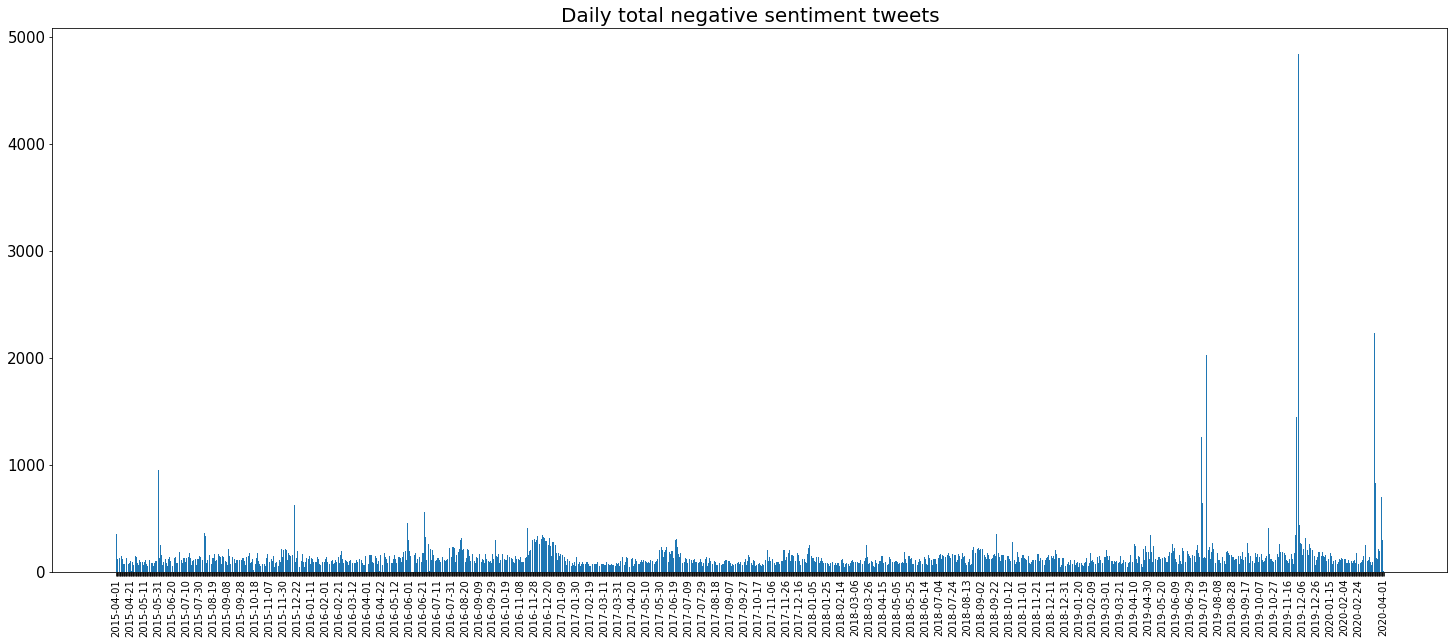

In [38]:
# plt chart of daily negative tweets

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.1)

x = df_daily_negative['date__'].astype(str)

labels = list(df_daily_negative['date__'].astype(str))

label_space = 20
for i in range(label_space,len(labels),label_space):
    for ii in range(1,label_space):
        labels[i-ii]=''

labels[len(labels)-1]=list(df_daily_negative['date__'].astype(str))[-1]
for ii in range(2,label_space):
    labels[len(labels)-ii]=''

y1 = df_daily_negative['sentiment']
ax.set_title('Daily total negative sentiment tweets', fontsize=20)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Twitter - justeat - daily negative tweets.png', bbox_inches = 'tight')
    
    slideTitle.append('Daily negative Tweets')
    slideText.append('7 November 2013 to '+ str(monthNow))
    imagePath.append('Twitter - justeat - daily negative tweets.png')
        
plt.show()


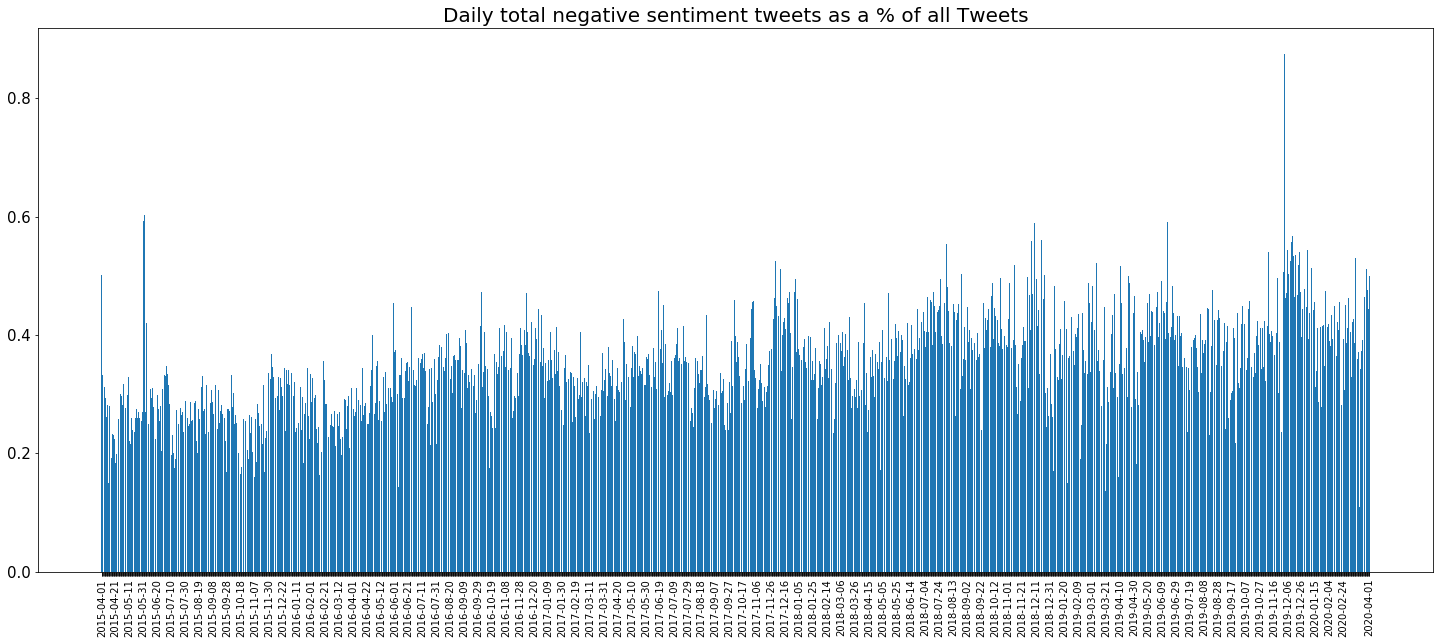

In [39]:
# plt chart of daily % negative tweets

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.1)

x = df_daily_negative['date__'].astype(str)

labels = list(df_daily_negative['date__'].astype(str))

label_space = 20
for i in range(label_space,len(labels),label_space):
    for ii in range(1,label_space):
        labels[i-ii]=''

labels[len(labels)-1]=list(df_daily_negative['date__'].astype(str))[-1]
for ii in range(2,label_space):
    labels[len(labels)-ii]=''

y1 = df_daily_negative['%_neg_tweets']
ax.set_title('Daily total negative sentiment tweets as a % of all Tweets', fontsize=20)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('Twitter - justeat - daily pct negative tweets.png', bbox_inches = 'tight')
    
    slideTitle.append('Daily negative Tweets as a % of all Tweets')
    slideText.append('7 November 2013 to '+ str(monthNow))
    imagePath.append('Twitter - justeat - daily pct negative tweets.png')
        
plt.show()


In [40]:
# calculate outliers using a 180 day rolling average
# to cater for changes in volumes of tweets over time

days = 180 # rolling average days
std_number = 4 # number of std deviations to be considered an outlier

df_daily_negative['rolling average'] = df_daily_negative['sentiment'].rolling(days).mean()
df_daily_negative['rolling std dev'] = df_daily_negative['sentiment'].rolling(days).std()
df_daily_negative['outlier'] = df_daily_negative['rolling average'] + std_number*df_daily_negative['rolling std dev']

In [41]:
# calculate outliers for % tweets using a 180 day rolling average
# assume no change over time

std_number_pct = 4 # number of std deviations to be considered an outlier

df_daily_negative['% average'] = df_daily_negative['%_neg_tweets'].mean()
df_daily_negative['% std dev'] = df_daily_negative['%_neg_tweets'].std()
df_daily_negative['% outlier'] = df_daily_negative['% average'] + std_number_pct*df_daily_negative['% std dev']

In [42]:
df_daily_negative.tail()

,date__,sentiment,sentiment_pos,total_tweets,check_col,%_neg_tweets,rolling average,rolling std dev,outlier,% average,% std dev,% outlier
1813,2020-03-28,485,463,948,0,0.511603,215.433333,414.629499,1873.951328,0.345853,0.078048,0.658043
1814,2020-03-29,700,772,1472,0,0.475543,218.472222,416.171020,1883.156301,0.345853,0.078048,0.658043
1815,2020-03-30,299,388,687,0,0.435226,219.388889,416.165636,1884.051434,0.345853,0.078048,0.658043
1816,2020-03-31,257,321,578,0,0.444637,219.877778,416.157800,1884.508978,0.345853,0.078048,0.658043
1817,2020-04-01,8,8,16,0,0.500000,219.066667,416.429108,1884.783100,0.345853,0.078048,0.658043


In [43]:
# create lists of tweets for the days that are outliers

outlier_days = list(df_daily_negative[df_daily_negative['sentiment'] > df_daily_negative['outlier']]['date__'])
outlier_days_pct = list(df_daily_negative[df_daily_negative['%_neg_tweets'] > df_daily_negative['% outlier']]['date__'])

outlier_tweets = []
outlier_tweets_pct = []
                                          

for date in outlier_days:
    outlier_tweets.append(list(df[df['date__'] == date]['tweet__']))
                                          
for date in outlier_days_pct:
    outlier_tweets_pct.append(list(df[df['date__'] == date]['tweet__']))

In [44]:
outlier_tweets[0][0:10]

['4662 [2015-12-18 23:58:41] - @Quinoderm Fingers crossed for a #WhiteChristmas where these @ASOS #festive #socks are a necessity! RT and Follow to #win',
 '4663 [2015-12-18 23:58:31] - RT @Quinoderm Fingers crossed for a #WhiteChristmas where these @ASOS #festive #socks are a necessity! RT and Follow to #win',
 '4664 [2015-12-18 23:50:51] - @ASOS  #ChristmasMadeMeDoIt',
 '4665 [2015-12-18 23:47:17] - 3rd time wearing these are you messing @ASOS pic.twitter.com/tEhDsaOrxC',
 '4666 [2015-12-18 23:46:18] - @ASOS ',
 '4667 [2015-12-18 23:44:32] - @ASOS  #ChristmasMadeMeDoIt',
 '4668 [2015-12-18 23:40:47] - @ASOS #ChristmasMadeMeDoIt ',
 "4669 [2015-12-18 23:33:20] - @ASOS yay! Can't wait to see what it is hehe  Thanks @ASOS  x x",
 '4670 [2015-12-18 23:32:17] - Who is this? I wish you would credit your models! I joined twitter just to ask :3 http://www.asos.com/ASOS/ASOS-Roll-Neck-Jumper-in-Twisted-Yarn/Prod/pgeproduct.aspx?iid=5225062\xa0… via @asos',
 '4671 [2015-12-18 23:31:25] - @ASOS

In [45]:
outlier_tweets_pct[0][0:10]

['1 [2019-12-01 23:59:57] - How cute!!! @ASOS  pic.twitter.com/coVeBFyqDD',
 '2 [2019-12-01 23:53:58] - I like big deals and I cannot lie #ASOSBlackFriday',
 '3 [2019-12-01 23:53:34] - I like big deals and I cannot lie #ASOSBlackFriday',
 "4 [2019-12-01 23:53:03] - Binge watching season 3 and realized how Monique demeaned you and your financial troubles..That shit pisses me off. I hope you guys are in a better place today but it goes to show how she's more about status",
 '5 [2019-12-01 23:45:54] - I like big deals and I cannot lie #ASOSBlackFriday',
 '6 [2019-12-01 23:44:03] - Haha easy peasy!! @ASOS tall range',
 '7 [2019-12-01 23:41:48] - I like big deals and I cannot lie',
 '8 [2019-12-01 23:39:17] - @Hermesparcels Why are you telling customers they can divert their parcel, then telling them privately you can’t? I’d appreciate a response given this is of @asos @ASOS_HeretoHelp doing.pic.twitter.com/XrEpoaUViv',
 '9 [2019-12-01 23:36:27] - I like big deals and I cannot lit #ASOSBlac

In [46]:
# write these lists to an excel file, one list per sheet

writer = pd.ExcelWriter('negative_tweet_sheets_keras.xlsx', engine='xlsxwriter')
for i in range(len(outlier_days)):
    df_excel = pd.DataFrame(np.array(outlier_tweets[i]), columns = ['tweets__'])
    df_excel.to_excel(writer, sheet_name=(outlier_days[i].strftime('%Y-%m-%d')), index=False, columns=None)
writer.save()

In [47]:
len(outlier_tweets), len(outlier_tweets_pct)

(16, 2)

In [48]:
df.tail()

,tweet__,date__,text__,text_cleaned,text_stopwordsRemoved,tokenized,sentiment_sigmoid,sentiment
736610,25450 [2020-03-31 01:18:47] - Hey @ASOS_Hereto...,2020-03-31,Hey @ASOS_HeretoHelp @ASOS \nLet’s do a collab...,hey lets do a collaboration whom do i need to ...,"[hey, let, collabor, need, speak]","[90, 96, 30, 796]",0.895490,1
736611,25451 [2020-03-31 01:18:25] - @ASOS\n@ASOS_Her...,2020-03-31,@ASOS\n@ASOS_HeretoHelp\nhttps://youtu.be/rSY4...,am i at risk if i buy something just asking f...,"[risk, buy, someth, ask, everi, person, need, ...","[3783, 252, 133, 298, 317, 332, 30, 133]",0.621684,1
736612,25452 [2020-03-31 01:14:35] - Oh apart from yo...,2020-03-31,Oh apart from you @ASOS you can take a long wa...,oh apart from you you can take a long walk of ...,"[oh, apart, take, long, walk, short, cliff]","[39, 836, 69, 99, 300, 536]",0.119724,0
736613,25453 [2020-03-31 01:11:46] - The reports from...,2020-03-31,The reports from @ASOS warehouse in Barnsley a...,the reports from warehouse in barnsley are dee...,"[report, warehous, barnsley, deepli, disturb, ...","[1004, 3340, 468, 82, 246, 38, 481, 116, 56, 6...",0.380704,0
736614,25454 [2020-03-31 01:04:27] - i’m just tryna g...,2020-03-31,i’m just tryna get my papers straight \n\nshir...,im just tryna get my papers straight shirt pan...,"[im, tryna, get, paper, straight, shirt, pant,...","[1, 2580, 3, 646, 1104, 779, 1360, 831]",0.156592,0


In [49]:
df_daily_negative.head()

,date__,sentiment,sentiment_pos,total_tweets,check_col,%_neg_tweets,rolling average,rolling std dev,outlier,% average,% std dev,% outlier
0,2015-04-01,1392,1383,2775,0,0.501622,NaN,NaN,NaN,0.345853,0.078048,0.658043
1,2015-04-02,349,700,1049,0,0.332698,NaN,NaN,NaN,0.345853,0.078048,0.658043
2,2015-04-03,120,399,519,0,0.231214,NaN,NaN,NaN,0.345853,0.078048,0.658043
3,2015-04-04,147,263,410,0,0.358537,NaN,NaN,NaN,0.345853,0.078048,0.658043
4,2015-04-05,116,255,371,0,0.312668,NaN,NaN,NaN,0.345853,0.078048,0.658043


In [50]:
df_daily_negative.nlargest(20, columns=['sentiment'])

,date__,sentiment,sentiment_pos,total_tweets,check_col,%_neg_tweets,rolling average,rolling std dev,outlier,% average,% std dev,% outlier
1695,2019-12-01,4838,691,5529,0,0.875023,210.683333,405.858983,1834.119263,0.345853,0.078048,0.658043
1804,2020-03-19,2233,4272,6505,0,0.343274,207.538889,411.935090,1855.279247,0.345853,0.078048,0.658043
443,2016-06-24,2197,1560,3757,0,0.584775,127.550000,165.727287,790.459150,0.345853,0.078048,0.658043
1563,2019-07-22,2024,3638,5662,0,0.357471,148.761111,177.460748,858.604101,0.345853,0.078048,0.658043
60,2015-05-31,1569,1077,2646,0,0.592971,NaN,NaN,NaN,0.345853,0.078048,0.658043
1692,2019-11-28,1446,14235,15681,0,0.092214,179.227778,201.734485,986.165719,0.345853,0.078048,0.658043
0,2015-04-01,1392,1383,2775,0,0.501622,NaN,NaN,NaN,0.345853,0.078048,0.658043
1556,2019-07-15,1257,4055,5312,0,0.236634,133.477778,102.138774,542.032873,0.345853,0.078048,0.658043
1733,2020-01-08,1182,570,1752,0,0.674658,226.455556,411.787469,1873.605432,0.345853,0.078048,0.658043
61,2015-06-01,949,626,1575,0,0.602540,NaN,NaN,NaN,0.345853,0.078048,0.658043


In [51]:
df_daily_negative.nlargest(20, columns=['%_neg_tweets'])

,date__,sentiment,sentiment_pos,total_tweets,check_col,%_neg_tweets,rolling average,rolling std dev,outlier,% average,% std dev,% outlier
1695,2019-12-01,4838,691,5529,0,0.875023,210.683333,405.858983,1834.119263,0.345853,0.078048,0.658043
1733,2020-01-08,1182,570,1752,0,0.674658,226.455556,411.787469,1873.605432,0.345853,0.078048,0.658043
61,2015-06-01,949,626,1575,0,0.602540,NaN,NaN,NaN,0.345853,0.078048,0.658043
60,2015-05-31,1569,1077,2646,0,0.592971,NaN,NaN,NaN,0.345853,0.078048,0.658043
1528,2019-06-17,337,234,571,0,0.590193,118.222222,56.650014,344.822278,0.345853,0.078048,0.658043
1337,2018-12-08,154,107,261,0,0.590038,139.733333,65.985236,403.674278,0.345853,0.078048,0.658043
443,2016-06-24,2197,1560,3757,0,0.584775,127.550000,165.727287,790.459150,0.345853,0.078048,0.658043
1276,2018-10-08,796,596,1392,0,0.571839,132.655556,67.725565,403.557817,0.345853,0.078048,0.658043
1707,2019-12-13,273,208,481,0,0.567568,220.555556,405.607486,1842.985499,0.345853,0.078048,0.658043
1347,2018-12-18,200,157,357,0,0.560224,142.088889,66.254654,407.107506,0.345853,0.078048,0.658043


In [52]:
#
# Preparing the presentation
#

In [53]:
if PwrptPrep == 1:
    try:
        prs = Presentation('Presentation - template.pptx')
    except:
        prs = Presentation('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/Presentation - template.pptx')

In [54]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [55]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        
        if i == 0:
            p.text = '1.6 million tweets were used to train the sentiment analysis model'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'they were taken from kaggle - https://www.kaggle.com/kazanova/sentiment140'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'a keras model with a LSTM Neural Network was used generating 5000 features'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the python suite of libraries and programs NLTK was used for the natural language processing'            
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'training was done over 75% of the tweets, testing over 25%'        
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'accuracy was 79%'           
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'for interest, other models were trained and tested:'        
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'CNN-LSTM; enhanced LSTM; fasttext; 1D Convolutional; enhanced 1D Convolutional' 
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'accuracy ranged from 70% (CNN-LSTM) to 79% (1D Convolutional)'            

        if i == 1:
            p.text = str(len(df)) + ' tweets in total were collected'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'daily from ' + str(df['date__'][0].strftime('%Y-%m-%d')) + ' to ' + str(df['date__'][len(df['date__'])-1].strftime('%Y-%m-%d'))
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'of which ' + str(df_daily_negative['sentiment'].sum()) + ' were determined to have a negative sentiment'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'when looking at the number of negative tweets per day and therefore looking for outlier spikes in negative tweet volume'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'there are ' + str(len(outlier_days)) + ' days where the number of negative tweets was over ' \
            + str(std_number) + ' standard devations from the ' + str(days) + ' rolling day average'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the tweets from each of those days has been downloaded to an excel spreadsheet, each tab represents a different day'
        

In [56]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [57]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [58]:
# add Appendix slide

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

In [59]:
# add the 'First 5 lines of the latest upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First 5 lines uploaded tweet file'

    rows = 6
    cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(0.5)
    table.columns[1].width = Inches(8.0)
#     table.columns[2].width = Inches(1.0)
#     table.columns[3].width = Inches(1.0)
#     table.columns[4].width = Inches(1.5)
#     table.columns[5].width = Inches(1.5)
    
    tableText = ['']
    
    # table headers
    for col in df.columns[0:cols-1]:
        tableText.append(col)
    
    # populate rest of list with dataframe cells
    for i in range((rows-1) * (cols-1)):
        if i%(cols-1) == 0:
            tableText.append(str(int(i/(cols-1))))          
        tableText.append(str(df.iat[int(i/(cols-1)), i%(cols-1)]))

    for i in range((rows) * cols):
        table.cell(int(i/(cols)), i%cols).text = tableText[i]
        cell = table.cell(int(i/(cols)), i%cols)
        para = cell.text_frame.paragraphs[0]
        if i%cols == 0 or int(i/cols) == 0:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(10)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [60]:
# add the methodology slide
# and the 'Code used to gather page', rotate the text
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:
    
    # list of appendix text files to take from my PC to be put into slides
    appendixTitleList = ['Limitations of this analysis','Appendix: Methodology',
                         'Code used to gather the twitter data part 1','Code used to gather the twitter data part 2',
                         'Code used to gather the twitter data part 3','Code used to gather the twitter data part 4',
                         'Code used to gather the twitter data part 5','Code used to gather the twitter data part 6',
                         'Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
    appendixFileList = ['Presentation - twitter sentiment limitations.txt','Presentation - twitter sentiment methodology.txt',
                        'Presentation - code twitter part 1.txt','Presentation - code twitter part 2.txt',
                        'Presentation - code twitter part 3.txt','Presentation - code twitter part 4.txt',
                        'Presentation - code twitter part 5.txt','Presentation - code twitter part 6.txt',
                        'Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']
    appendixFileList_alt = []
    for element in appendixFileList:
        appendixFileList_alt.append('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/' + element)
    
    for i in range(len(appendixTitleList)):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        try:
            lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        except:
            lines = [line.rstrip('\n') for line in open(appendixFileList_alt[i])]
        
        if (appendixTitleList[i] == 'Code used to gather the twitter data part 1') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 2') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 3') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 4') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 5') or \
        (appendixTitleList[i] == 'Code used to gather the twitter data part 6'): # rotate the text code -90
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(-4.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = -90            
        else: # other slides are normal
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(0.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = 0
            
        tf = txBox.text_frame
        tf.word_wrap = True
        
        for ii in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
        
            if (appendixTitleList[i] == 'Code used to gather the twitter data part 1') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 2') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 3') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 4') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 5') or \
            (appendixTitleList[i] == 'Code used to gather the twitter data part 6'): # reduce the font size
                p.font.size = Pt(8)
                p.level = 0  
            else:
                txBox.rotation = 0
                p.font.size = Pt(12)            
            
            if 'https' in lines[ii]:
                r = p.add_run()
                r.text = lines[ii].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[ii].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[ii]


In [61]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [62]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [63]:
#
# all the slide types
# only to be run for reference
#

In [64]:
# prs = Presentation('Persentation - template.pptx')

In [65]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [66]:
# prs.save('presentationPrep - all the slides.pptx')